* k means on some dummy data

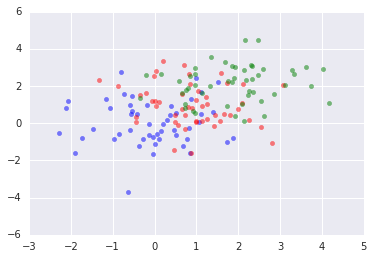

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N = 50

muCluster1 = np.array([0,0])
covCluster1 = np.array([[1,0],[0,1]])
cluster1Sample = np.random.multivariate_normal(muCluster1, covCluster1, N).T
assert cluster1Sample.shape == (2,N), "Incorrect dimensions"

muCluster2 = np.array([1,1])
covCluster2 = np.array([[1,0],[0,1]])
cluster2Sample = np.random.multivariate_normal(muCluster2, covCluster2, N).T
assert cluster2Sample.shape == (2,N), "Incorrect dimensions"

muCluster3 = np.array([2,2])
covCluster3 = np.array([[1,0],[0,1]])
cluster3Sample = np.random.multivariate_normal(muCluster3, covCluster3, N).T
assert cluster3Sample.shape == (2,N), "Incorrect dimensions"

plt.scatter(cluster1Sample[0], cluster1Sample[1], color='blue', alpha=0.5)
plt.scatter(cluster2Sample[0], cluster2Sample[1], color='red', alpha=0.5)
plt.scatter(cluster3Sample[0], cluster3Sample[1], color='green', alpha=0.5)
plt.show()

In [53]:
X = np.concatenate((cluster1Sample, cluster2Sample, cluster3Sample), axis=1)
assert X.shape == (2,N*3), "Incorrect dimensions"

X

array([[ 0.9847232 , -2.12463308,  1.05372113, -0.02678173, -0.84954842,
        -2.27140496, -0.18709721, -1.91047523,  0.5239447 , -0.95884036,
        -1.06290456,  1.10016008, -0.54794598,  0.30270002,  1.86421251,
         0.39311475, -0.37059771,  1.50865358, -0.58199286,  0.84186443,
        -2.06237896,  0.51208673,  0.81767116,  0.01034166,  1.10699393,
        -0.73985456, -0.27367403, -0.5545635 ,  0.86385305, -0.40774693,
        -0.12986045,  0.0609681 , -1.47820676, -0.59311851, -0.1423714 ,
        -0.54092518, -1.16949683,  0.15861835,  0.77716356, -1.73895992,
         1.72391013,  0.46090411, -0.80808997,  0.36564653, -0.03188098,
        -0.63220645,  0.20090832,  1.39414361,  0.11410062,  0.68797236,
         1.66060579, -1.31446934,  1.2550328 ,  0.86000271,  0.4846115 ,
         0.86272955,  1.56351239,  0.20212484,  0.98973581,  2.8017153 ,
         0.73600665,  1.1251273 ,  1.58362182, -0.1980561 ,  0.45960641,
        -0.44214271,  0.11093929,  2.54644055,  1.1

In [112]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X.T)
yHat = kmeans.predict(X.T)

In [76]:
X.T.shape

(150, 2)

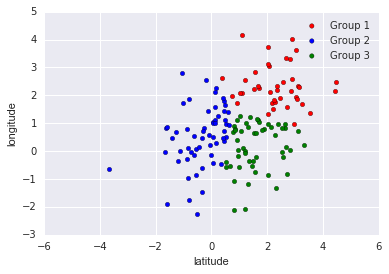

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.DataFrame(X.T)

yHat = pd.Series(yHat)
df = pd.concat([data, yHat], axis=1)
df.columns = ['longitude','latitude','cluster']

ax = df[(df['cluster']==0)].plot(kind='scatter', x='latitude', y='longitude', color='red', label='Group 1');
df[(df['cluster']==1)].plot(kind='scatter', x='latitude', y='longitude', color='blue', label='Group 2', ax=ax);
df[(df['cluster']==2)].plot(kind='scatter', x='latitude', y='longitude', color='green', label='Group 3', ax=ax);

In [114]:
df

,longitude,latitude,cluster
0,0.984723,2.404819,2
1,-2.124633,0.796174,2
2,1.053721,0.058064,1
3,-0.026782,-1.664392,1
4,-0.849548,-0.568473,1
5,-2.271405,-0.527080,1
6,-0.187097,0.969367,2
7,-1.910475,-1.589249,1
8,0.523945,-0.609190,1
9,-0.958840,-0.829436,1


* k means on dataset

* estimate and plot all clusters

In [223]:
import pandas as pd

In [229]:
X = pd.read_csv('~/capstone/input/dataset_tsmc2014/dataset_TSMC2014_NYC.txt',sep='\t',header=None,\
            names = ['UserID','VenueID','VenueCatID','VenueCatName','Latitude','Longitude','TimeZoneOffset','UTCtime'])
X = X[['Latitude','Longitude']].as_matrix()
X[0:10]

array([[ 40.71981038, -74.00258103],
       [ 40.60679958, -74.04416981],
       [ 40.71616168, -73.88307006],
       [ 40.7451638 , -73.98251878],
       [ 40.74010383, -73.98965836],
       [ 40.69042712, -73.95468678],
       [ 40.75159143, -73.9741214 ],
       [ 40.77942173, -73.95534113],
       [ 40.61915107, -74.0358876 ],
       [ 40.61900594, -73.99037473]])

In [230]:
from sklearn.cluster import KMeans

k = 59
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
yHat = kmeans.predict(X)

In [231]:
yHat[0:10]

array([35, 29, 20, 18, 18, 37, 32, 15,  6, 14], dtype=int32)

In [234]:
coords = pd.DataFrame(X)
coords.columns = ['Latitude','Longitude']
coords.head()

,Latitude,Longitude
0,40.719810,-74.002581
1,40.606800,-74.044170
2,40.716162,-73.883070
3,40.745164,-73.982519
4,40.740104,-73.989658


In [243]:
cluster = pd.DataFrame(yHat)
cluster.columns = ['Cluster']
cluster.head()

,Cluster
0,35
1,29
2,20
3,18
4,18


In [253]:
df = pd.concat([coords, cluster], axis=1)
#df.columns = ['longitude','latitude','cluster']
df.to_csv('cluster.csv')
df.head()

,Latitude,Longitude,Cluster
0,40.719810,-74.002581,35
1,40.606800,-74.044170,29
2,40.716162,-73.883070,20
3,40.745164,-73.982519,18
4,40.740104,-73.989658,18


TypeError: 'Figure' object is not callable

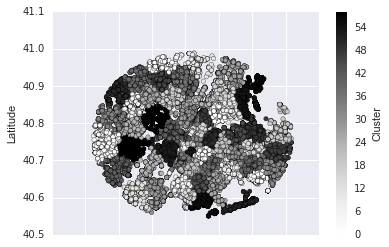

In [249]:
plt = df.plot(kind='scatter', x='Longitude', y='Latitude', c='Cluster')
plt.figure(figsize=(20,10))
plt.show()

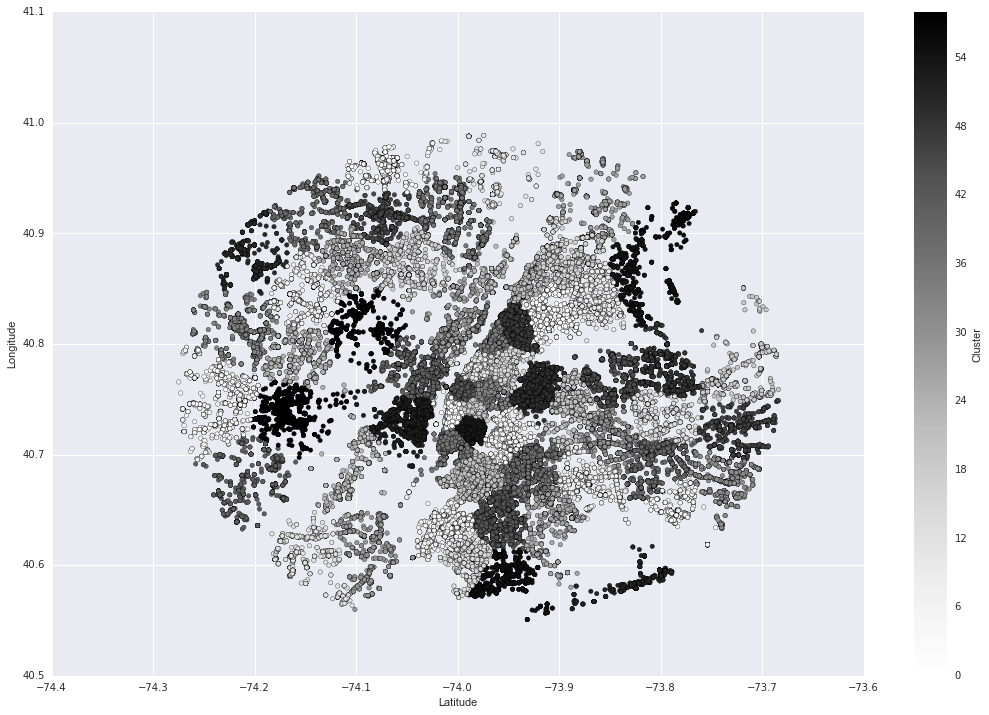

In [252]:
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots(figsize=(15,10))
ax = df.plot(kind='scatter', x='Longitude', y='Latitude', c='Cluster',ax=ax)
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
fig.tight_layout()
plt.show()

* sandbox

In [164]:
X.groupby(['UserID']).count().describe()

,Latitude,Longitude
count,1083.000000,1083.000000
mean,209.998153,209.998153
std,188.464409,188.464409
min,100.000000,100.000000
25%,120.000000,120.000000
50%,153.000000,153.000000
75%,220.000000,220.000000
max,2697.000000,2697.000000


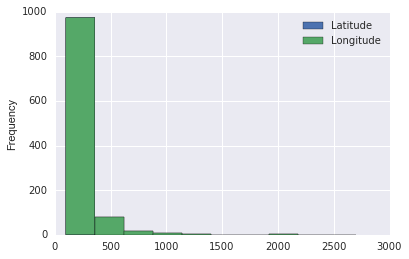

In [166]:
X.groupby(['UserID']).count().plot.hist()

In [202]:
from sklearn.cluster import KMeans

x = X[X['UserID']==470]

k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(x)
yHat = kmeans.predict(x)

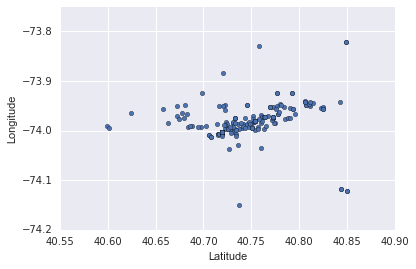

In [199]:
x = X[X['UserID']==470]
x = x[['Latitude','Longitude']]
x.plot(kind='scatter', x='Latitude', y='Longitude')

In [222]:
len(x[['Latitude','Longitude']])
x[['Latitude','Longitude']].as_matrix

<bound method DataFrame.as_matrix of         Latitude  Longitude
0      40.719810 -74.002581
626    40.683178 -73.965746
650    40.624513 -73.965070
652    40.677611 -73.963748
654    40.702752 -73.990696
655    40.687583 -73.989895
660    40.679694 -73.974252
674    40.705436 -74.008348
677    40.599278 -73.990891
678    40.657351 -73.956644
700    40.705436 -74.008348
730    40.697673 -73.993413
736    40.683827 -73.992498
738    40.662834 -73.985109
744    40.601689 -73.993858
747    40.685820 -73.991081
759    40.721988 -73.957536
762    40.757394 -73.993301
965    40.742965 -73.974162
966    40.714905 -74.005972
968    40.725355 -73.997520
969    40.760624 -73.985307
970    40.732874 -73.997594
973    40.763788 -73.997501
975    40.741209 -73.987684
1125   40.811519 -73.950273
1127   40.715652 -74.007132
1148   40.757953 -73.829155
1162   40.754239 -73.999413
2084   40.719810 -74.002581
...          ...        ...
32058  40.732690 -73.974638
32696  40.719810 -74.002581
36162  40.7

In [219]:
len(yHat)
yHat = pd.Series(yHat)
yHat.head()

0    2
1    2
2    2
3    2
4    2
dtype: int32

In [220]:
data = pd.DataFrame(x[['Latitude','Longitude']].as_matrix)

yHat = pd.Series(yHat)
df = pd.concat([data, yHat], axis=1)
df.columns = ['longitude','latitude','cluster']

ax = df[(df['cluster']==0)].plot(kind='scatter', x='latitude', y='longitude', color='red', label='Group 1');
df[(df['cluster']==1)].plot(kind='scatter', x='latitude', y='longitude', color='blue', label='Group 2', ax=ax);
df[(df['cluster']==2)].plot(kind='scatter', x='latitude', y='longitude', color='green', label='Group 3', ax=ax);

PandasError: DataFrame constructor not properly called!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.DataFrame(x)

yHat = pd.Series(yHat)
df = pd.concat([data, yHat], axis=1)
df.columns = ['longitude','latitude','cluster']

ax = df[(df['cluster']==0)].plot(kind='scatter', x='latitude', y='longitude', color='red', label='Group 1');
df[(df['cluster']==1)].plot(kind='scatter', x='latitude', y='longitude', color='blue', label='Group 2', ax=ax);
df[(df['cluster']==2)].plot(kind='scatter', x='latitude', y='longitude', color='green', label='Group 3', ax=ax);

* sklearn pipeline

In [122]:
import sklearn as sk
from sklearn import pipeline 
from sklearn.cluster import KMeans

class ColumnSelectTransformer(sk.base.BaseEstimator, sk.base.TransformerMixin):
    
    def fit(self,X, y=None):
        return self
    
    def transform(self,X):
        return X[['Latitude','Longitude']]

latlong_pipe = pipeline.Pipeline([
  ('columnSelect', ColumnSelectTransformer()),
  ('kNeighbors', KMeans()),
  ])

latlong_pipe.fit(X)

Pipeline(steps=[('columnSelect', ColumnSelectTransformer()), ('kNeighbors', KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0))])